<a href="https://colab.research.google.com/github/yogeshkumar22/NFL_2018/blob/main/Adding%20Players%20onto%20the%20Field/Visualizing_players_onto_the_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Players onto the Field

The fourth dataset that we will be looking at is the dataset containing the tracking information of the players. Such kind of datasets are very helpful in breaking down different players gameplays on a personal level.

We will be visualizing the players on the field that we had built. 

This dataset contains the following information:

- time: Time stamp of play (time, yyyy-mm-dd, hh:mm:ss)

- x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)

- y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)

- s: Speed in yards/second (numeric)

- a: Acceleration in yards/second^2 (numeric)

- dis: Distance traveled from prior time point, in yards (numeric)

- o: Player orientation (deg), 0 - 360 degrees (numeric)

- dir: Angle of player motion (deg), 0 - 360 degrees (numeric)

- event: Tagged play details, including moment of ball snap, pass release, pass catch, tackle, etc (text)

- nflId: Player identification number, unique across players (numeric)

- displayName: Player name (text)

- jerseyNumber: Jersey number of player (numeric)

- position: Player position group (text)

- team: Team (away or home) of corresponding player (text)

- frameId: Frame identifier for each play, starting at 1 (numeric)

- gameId: Game identifier, unique (numeric)

- playId: Play identifier, not unique across games (numeric)

- playDirection: Direction that the offense is moving (text, left or right)

- route: Route ran by offensive player (text)

Let us start by importing the necessary modules,

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [2]:
def create_football_field():
    
    # Create a rectangle defined via an anchor point *xy* and its *width* and *height*
    rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

    # Creating a subplot to plot our field on
    fig, ax = plt.subplots(1, figsize=(12, 6.33))

    # Adding the rectangle to the plot
    ax.add_patch(rect)

    # Plotting a line plot for marking the field lines
    plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
              0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white', zorder = 0)

    # Creating the left end-zone
    left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Creating the right end-zone
    right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Adding the patches to the subplot
    ax.add_patch(left_end_zone)
    ax.add_patch(right_end_zone)

    # Setting the limits of x-axis from 0 to 120
    plt.xlim(0, 120)

    # Setting the limits of y-axis from -5 to 58.3
    plt.ylim(-5, 58.3)

    # Removing the axis values from the plot
    plt.axis('off')

    # Plotting the numbers starting from x = 20 and ending at x = 110
    # with a step of 10
    for x in range(20, 110, 10):

        # Intializing another variable named 'number'
        number = x

        # If x exceeds 50, subtract it from 120
        if x > 50:
            number = 120 - x

        # Plotting the text at the bottom
        plt.text(x, 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white')

        # Plotting the text at the top
        plt.text(x - 0.95, 53.3 - 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white',
                 rotation=180)

    # Making ground markings
    for x in range(11, 110):
            ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
            ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
            ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
            ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)
    
    # Returning the figure and axis
    return fig, ax

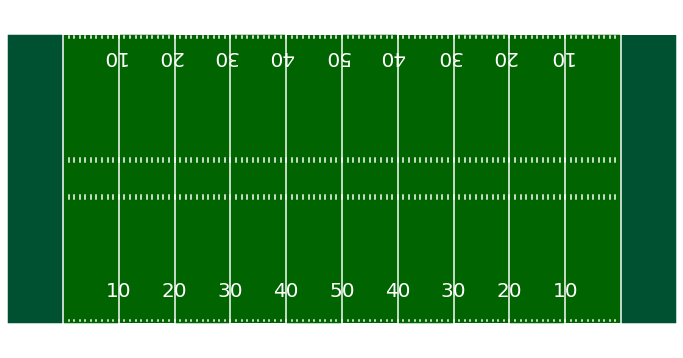

In [3]:
# Calling the plotting function
fig, ax = create_football_field()

# Plotting the figure
plt.show()

Next, importing the dataset called `week_data.csv` which contains the tracking information of players.

In [4]:
# Reading the data as a Pandas DataFrame
df = pd.read_csv('week_data.csv')

In [5]:
# Looking at the first five rows of the DataFrame 
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-11-16T01:24:15.799Z,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,2018-11-16T01:24:15.799Z,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,2018-11-16T01:24:15.799Z,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,2018-11-16T01:24:15.799Z,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,2018-11-16T01:24:15.799Z,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN


In [6]:
# Looking at the shape of the DataFrame
df.shape

(932240, 19)

Since the time is in an improper format for analysis, let us convert it to datetime.

In [7]:
# Converting to Time values
df['time'] = pd.to_datetime(df['time']).dt.time

# Looking at the first five rows of the DataFrame 
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,01:24:15.799000,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,01:24:15.799000,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,01:24:15.799000,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,01:24:15.799000,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,01:24:15.799000,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN


We would want to analyze each game by the passage of time, so let us sort the values to be ascending.

In [8]:
# Sorting the values of the DataFrame by time in an ascending order
df = df.sort_values(by='time', ascending=True).reset_index(drop=True)

# Looking at the first five rows of the DataFrame 
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,00:00:38.500000,86.80,44.97,0.01,0.01,0.01,265.98,318.85,None,2552600.0,Nelson Agholor,13.0,WR,1,away,2018111809,3294,left,GO
1,00:00:38.500000,80.39,37.16,0.08,0.23,0.01,89.72,339.97,None,2552484.0,P.J. Williams,26.0,CB,1,home,2018111809,3294,left,NaN
2,00:00:38.500000,86.34,36.31,0.00,0.00,0.00,285.81,269.36,None,497326.0,Golden Tate,19.0,WR,1,away,2018111809,3294,left,SCREEN
3,00:00:38.500000,85.10,23.74,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018111809,3294,left,NaN
4,00:00:38.500000,86.82,7.17,0.03,0.02,0.01,263.02,288.96,None,2560949.0,Josh Adams,33.0,RB,1,away,2018111809,3294,left,GO


Let us select a specific gameId and playID to visualize the player positions within a specific game and play.

In [9]:
# Selecting the data for the given game and play based on their Id
sel_df = df.query('gameId == 2018111900 and playId == 5577')

# Looking at the shape of the DataFrame
print(f'The shape of the DataFrame is: {sel_df.shape}')

# Looking at the DataFrame
sel_df

The shape of the DataFrame is: (1770, 19)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
282518,04:57:48,84.26,23.74,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018111900,5577,left,NaN
282519,04:57:48,83.26,29.86,0.00,0.00,0.00,64.10,79.64,None,2558830.0,Samson Ebukam,50.0,OLB,1,home,2018111900,5577,left,NaN
282520,04:57:48,63.54,18.25,0.07,0.76,0.01,67.33,3.53,None,2558183.0,John Johnson,43.0,SS,1,home,2018111900,5577,left,NaN
282521,04:57:48,88.42,23.54,0.11,0.04,0.01,272.66,325.11,None,2558125.0,Patrick Mahomes,15.0,QB,1,away,2018111900,5577,left,NaN
282522,04:57:48,79.76,26.36,0.01,0.01,0.00,105.22,4.91,None,2556593.0,Cory Littleton,58.0,ILB,1,home,2018111900,5577,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284283,04:57:59.700000,60.25,29.51,6.40,2.21,0.65,314.31,294.95,None,2540204.0,Spencer Ware,32.0,RB,118,away,2018111900,5577,left,FLAT
284284,04:57:59.700000,63.23,45.92,3.81,1.20,0.37,257.27,262.77,None,1037374.0,Sam Shields,37.0,CB,118,home,2018111900,5577,left,NaN
284285,04:57:59.700000,52.42,49.74,3.74,1.48,0.38,12.75,290.79,None,2553536.0,Troy Hill,32.0,CB,118,home,2018111900,5577,left,NaN
284286,04:57:59.700000,84.26,28.11,1.73,0.54,0.17,260.29,249.13,None,2558830.0,Samson Ebukam,50.0,OLB,118,home,2018111900,5577,left,NaN


Now, let us seperate out the teams as well as the football in the data for plotting.

In [10]:
# Selecting the home and away team
home_team = sel_df.query('team == "home"')
away_team = sel_df.query('team == "away"')

# Selecting the football
football = sel_df.query('team == "football"')

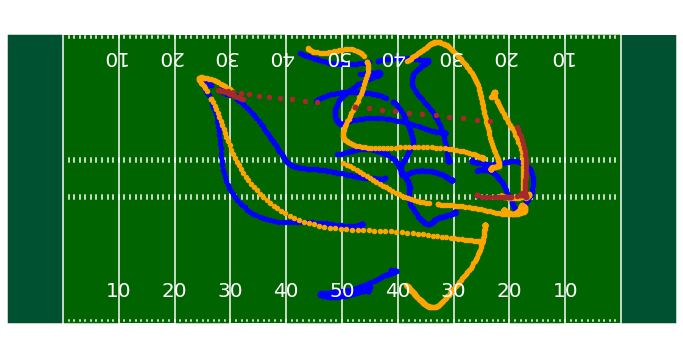

In [11]:
# Creating the football field
fig, ax = create_football_field()

# Plotitng the home team
home_team.plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=20, zorder=2)

# Plotting the away team
away_team.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=20, zorder=2)

# Plotting the football
football.plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

# Displaying the plot
plt.show()

We can also visualize a specific event by just selecting the event.

In [12]:
sel_df['event'].unique()

array(['None', 'ball_snap', 'first_contact', 'pass_forward',
       'pass_outcome_interception', 'tackle'], dtype=object)

Plotting the data for the event of ball_snap, that is, when the quarterback first receives the football.

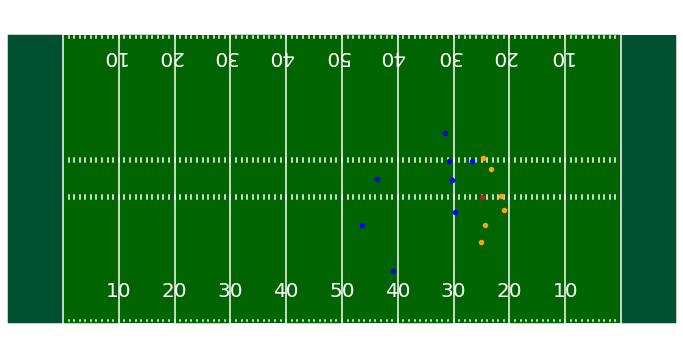

In [13]:
# Creating the football field
fig, ax = create_football_field()

# Plotitng the home team
home_team.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=20, zorder=2)

# Plotting the away team
away_team.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=20, zorder=2)

# Plotting the football
football.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

# Displaying the plot
plt.show()

In this way, we can visualize any game, play and event on the football field.

